In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gym
import sarsa
import sarsa_lambda
import qlearning
from importlib import reload

# Frozen Lake

In [176]:
env=gym.make('FrozenLake8x8-v0')

[2017-01-04 21:15:29,007] Making new env: FrozenLake8x8-v0


In [193]:
reload(sarsa)
sarsa_scores, sarsa_policy = sarsa.run(env, win=0.99, alpha_init=0.15)

Episodes: 2000. Score: 0.01 Alpha: 0.15 Eps: 1
Episodes: 4000. Score: 0.21 Alpha: 0.075 Eps: 0.3
Episodes: 6000. Score: 0.69 Alpha: 0.05 Eps: 0.09
Episodes: 8000. Score: 0.88 Alpha: 0.0375 Eps: 0.027
Episodes: 10000. Score: 0.96 Alpha: 0.03 Eps: 0.0081


In [212]:
reload(sarsa_lambda)
sarsaL_scores, sarsaL_policy = sarsa_lambda.run(env, win=0.99, alpha_init=0.15)

Episodes: 2000. Score: 0.00 Alpha: 0.15 Eps: 1
Episodes: 4000. Score: 0.12 Alpha: 0.075 Eps: 0.3
Episodes: 6000. Score: 0.73 Alpha: 0.05 Eps: 0.09
Episodes: 8000. Score: 0.90 Alpha: 0.0375 Eps: 0.027


In [205]:
reload(qlearning)
q_scores, q_policy = qlearning.run(env, win=0.99, alpha_init=0.1)

Episodes: 2000. Score: 0.01 Alpha: 0.1 Eps: 1
Episodes: 4000. Score: 0.18 Alpha: 0.05 Eps: 0.3
Episodes: 6000. Score: 0.60 Alpha: 0.033333 Eps: 0.09
Episodes: 8000. Score: 0.92 Alpha: 0.025 Eps: 0.027


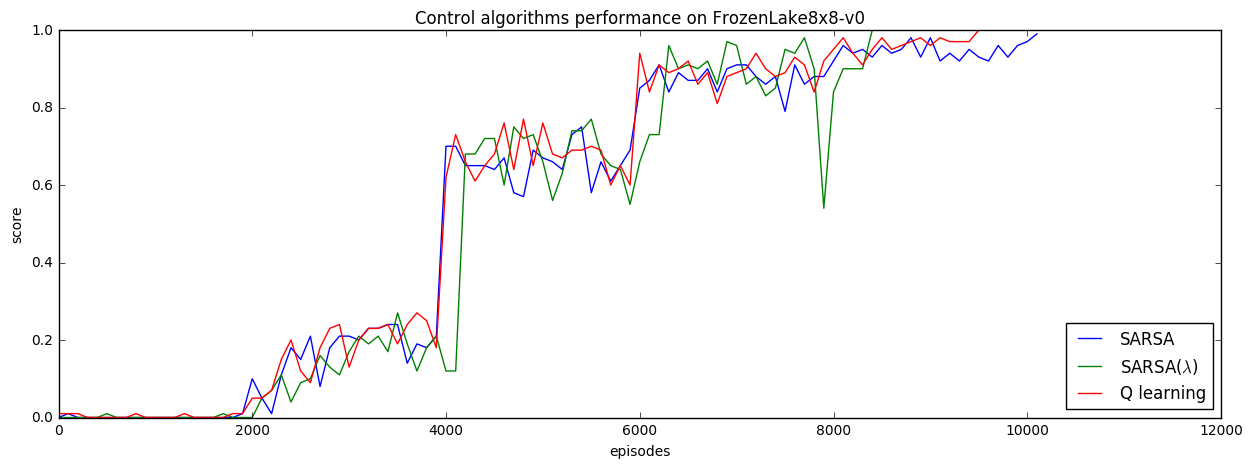

In [213]:
plt.figure(figsize = (15, 5))
plt.plot(np.arange(len(sarsa_scores)) * 100, sarsa_scores, label='SARSA')
plt.plot(np.arange(len(sarsaL_scores)) * 100, sarsaL_scores, label='SARSA($\lambda$)')
plt.plot(np.arange(len(q_scores)) * 100, q_scores, label='Q learning')
plt.title('Control algorithms performance on FrozenLake8x8-v0')
plt.xlabel('episodes')
plt.ylabel('score')
plt.legend(loc=4)
plt.show()

In [214]:
env=gym.make('Taxi-v1')

[2017-01-04 21:54:11,926] Making new env: Taxi-v1


In [215]:
reload(sarsa)
sarsa_taxi_scores, sarsa_taxi_policy = sarsa.run(env, win=9.7, alpha_init=0.15)

Episodes: 2000. Score: -2090.89 Alpha: 0.15 Eps: 1
Episodes: 4000. Score: -124.75 Alpha: 0.075 Eps: 0.3
Episodes: 6000. Score: 4.69 Alpha: 0.05 Eps: 0.09
Episodes: 8000. Score: 7.75 Alpha: 0.0375 Eps: 0.027


In [216]:
reload(sarsa_lambda)
sarsaL_taxi_scores, sarsaL_taxi_policy = sarsa_lambda.run(env, win=9.7, alpha_init=0.3)

Episodes: 2000. Score: -2101.34 Alpha: 0.3 Eps: 1
Episodes: 4000. Score: -6.93 Alpha: 0.15 Eps: 0.3
Episodes: 6000. Score: 5.42 Alpha: 0.1 Eps: 0.09
Episodes: 8000. Score: 8.21 Alpha: 0.075 Eps: 0.027


In [217]:
reload(qlearning)
q_taxi_scores, q_taxi_policy = qlearning.run(env, win=9.7, alpha_init=0.2)

Episodes: 2000. Score: -2162.18 Alpha: 0.2 Eps: 1
Episodes: 4000. Score: -9.79 Alpha: 0.1 Eps: 0.3
Episodes: 6000. Score: 7.50 Alpha: 0.066667 Eps: 0.09


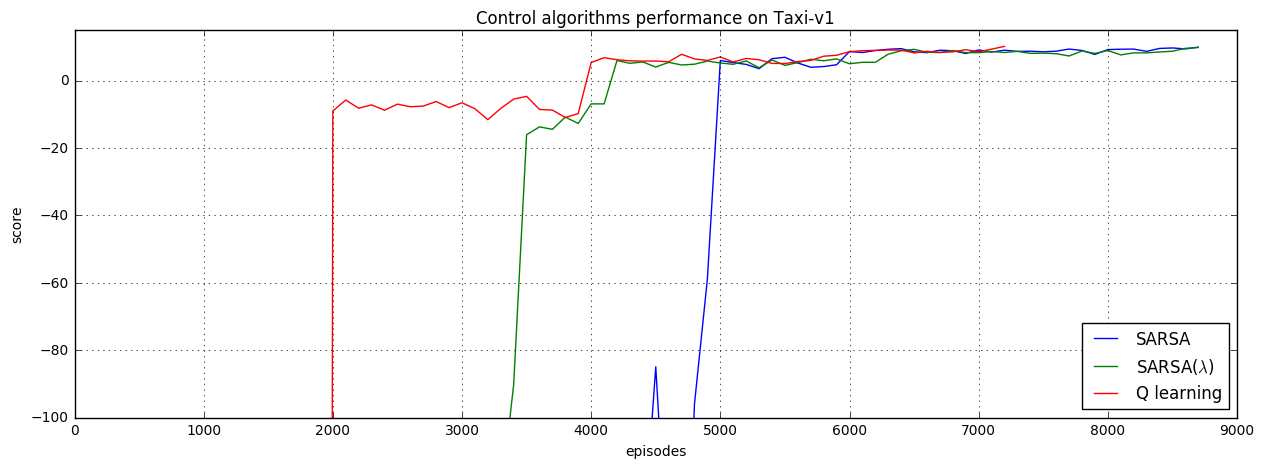

In [218]:
plt.figure(figsize = (15, 5))
plt.plot(np.arange(len(sarsa_taxi_scores)) * 100, sarsa_taxi_scores, label='SARSA')
plt.plot(np.arange(len(sarsaL_taxi_scores)) * 100, sarsaL_taxi_scores, label='SARSA($\lambda$)')
plt.plot(np.arange(len(q_taxi_scores)) * 100, q_taxi_scores, label='Q learning')
plt.title('Control algorithms performance on Taxi-v1')
plt.ylim(-100, 15)
plt.xlabel('episodes')
plt.ylabel('score')
plt.legend(loc=4)
plt.grid()
plt.show()

In [219]:
import time
from IPython.display import clear_output
policy = q_taxi_policy
state = env.reset()
env.render()
for i in range(100):
    action = np.random.choice(env.nA, p=policy[state, :])
    n_state, reward, done, info = env.step(action)
    clear_output()
    env.render()
    print('Rewrad:', reward)
    time.sleep(1)
    if done:
        state = env.reset()
        env.render()
    else:
        state = n_state

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Rewrad: -1
